Overview
There are 13 columns in dataset

# About Dataset
## Context
Google PlayStore Android App Data. (2.3 Million+ App Data)
Kaggle link : https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps

## Metadata
The dataset contains Application data of more than 600K applications with the following 23 attributes.-

+ App Name : Name of the application

+ App Id: Unique Application Id

+ Category: Category of application to which it belongs

+ Rating : Average rating  given to the application by a user

+ Rating count : Number of rating for the application
 
+ Installs :Approximate install count

+ Minimum Installs :Approximate minimum app install count

+ Maximum Installs : Approximate maximum app install count

+ Free : Whether app is Free or Paid

+ Price: App price

+ Currency

+ Size

+ Minimum
 Android
+ Developer
 Id
+ Developer
 Website
+ Developer
 Email
+ Released

+ Privacy
 Policy
+ Last
 Updated
+ Content
 Rating
+ Ad
 Supported
+ In
 app purchases
+ Editor
 Choice

## Libraries Used
* numpy
* pandas
* matplotlib
* seaborn

## Importing all libraries

In [1]:
import pandas as pd
import ydata_profiling as yd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Windows 10\.conda\envs\d_science\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#set options to be maximum for rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("google_playstore.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [7]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


#### Minimum Rating for Rating column can't be zero as apps are ranked from 1 to 5

In [20]:
df.loc[df["Rating"]==0].head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,USD,46M,6.0 and up,Imocci GmbH,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,True,0.0,USD,1.3M,4.4 and up,Yilver Molina Hurtatiz,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35


It means apps that are not ranked by users ,
#### meaning measing values are filled as '0' 
We need to fill them with nan values otherwise it will lead to wrong analysis and inconsistent results

#### Rating Count and Size should be a number
Installs have a lot of categories , so we need to convert it into some meaningful and fewer groups

In [23]:
df.isnull().sum().sort_values(ascending=False)

Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  5
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

A lot of missing values are present in the dataset

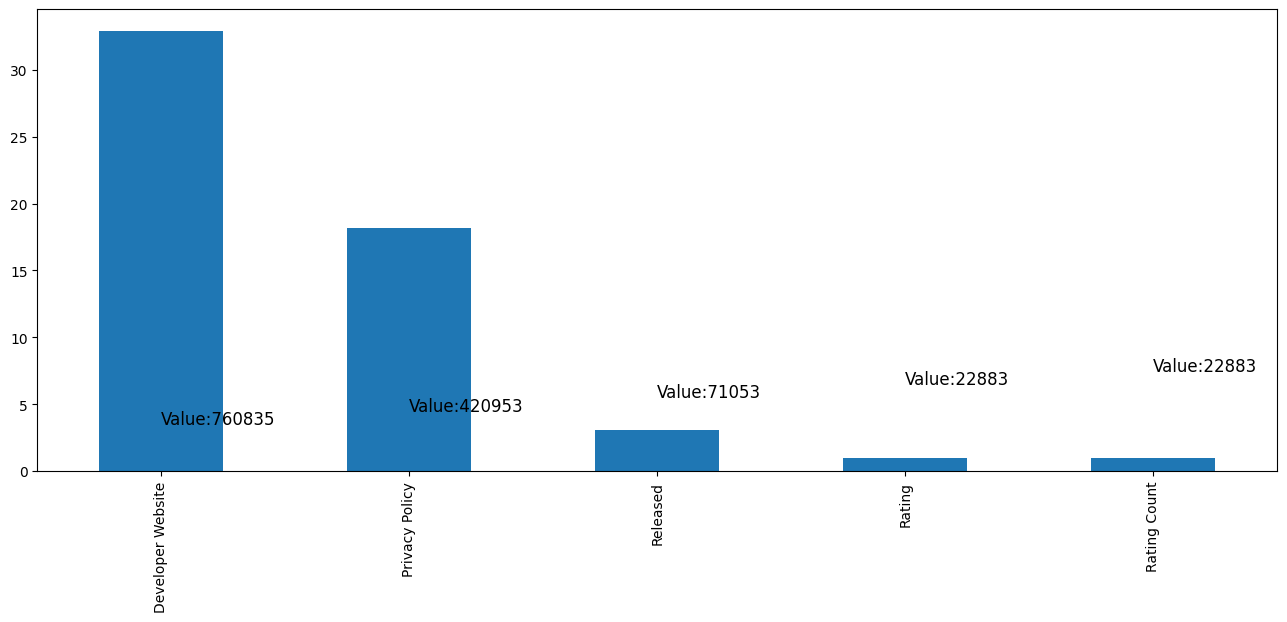

In [30]:
plt.figure(figsize=(16,6))
#plot the null values by their precentage, only if the null values are more than 0.5%
missing_values=df.isnull().sum().sort_values(ascending=False)/len(df)*100
missing_values=missing_values[missing_values>0.5].plot(kind='bar')
plt.text(0,3.5,"Value:760835",fontsize=12) # respective null values
plt.text(1,4.5,"Value:420953",fontsize=12)
plt.text(2,5.5,"Value:71053",fontsize=12)
plt.text(3,6.5,"Value:22883",fontsize=12)
plt.text(4,7.5,"Value:22883",fontsize=12)
plt.title("Frequency of Null values in different Columns")
plt.show()

1) Fig. 1 shows frequency of Null values in different Columns, we will attention to only these columns

1) Preprocessing Begins

##### For Rating
* We will impute nan values later 

In [37]:
df["Rating"].unique()

array([nan, 4.4, 5. , 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6,
       4.1, 2.5, 2.3, 2.1, 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, 1.5, 3.5, 2.9, 1.3, 2.8, 3. , 2.2, 1.8, 1.4, 1.2, 1.9, 1.7,
       1.6, 1. , 1.1])

In [32]:
df["Rating"]=df["Rating"].fillna(0)
df["Rating"]=df["Rating"].apply(lambda x: np.nan if x==0 else x)

In [36]:
df["Rating"].unique()

array([nan, 4.4, 5. , 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6,
       4.1, 2.5, 2.3, 2.1, 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, 1.5, 3.5, 2.9, 1.3, 2.8, 3. , 2.2, 1.8, 1.4, 1.2, 1.9, 1.7,
       1.6, 1. , 1.1])

2) Dealing with Rating Count and Size
* Changing their data type

In [49]:
df["Size"].value_counts()

Size
Varies with device    74777
11M                   62157
12M                   56080
13M                   48034
14M                   45211
16M                   42474
15M                   41306
17M                   37244
10M                   34114
18M                   31707
19M                   29723
21M                   29023
20M                   28796
22M                   28261
23M                   27337
24M                   25301
25M                   25023
26M                   23897
27M                   21826
28M                   21157
29M                   20050
37M                   18658
30M                   18625
31M                   18150
4.9M                  17967
32M                   17629
4.2M                  17421
3.8M                  17193
3.7M                  16927
38M                   16811
3.4M                  16752
33M                   16681
4.0M                  16481
3.5M                  16379
3.9M                  16288
3.3M           

#### convert all size data into Mbs and replace 'Varies with device' to nan values

In [65]:
df.value_counts("Size")

Size
Varies with device    74777
11M                   62157
12M                   56080
13M                   48034
14M                   45211
16M                   42474
15M                   41306
17M                   37244
10M                   34114
18M                   31707
19M                   29723
21M                   29023
20M                   28796
22M                   28261
23M                   27337
24M                   25301
25M                   25023
26M                   23897
27M                   21826
28M                   21157
29M                   20050
37M                   18658
30M                   18625
31M                   18150
4.9M                  17967
32M                   17629
4.2M                  17421
3.8M                  17193
3.7M                  16927
38M                   16811
3.4M                  16752
33M                   16681
4.0M                  16481
3.5M                  16379
3.9M                  16288
3.3M           

In [84]:
def convert_data_sizes(val):
    # val=val.replace(",","")
    if 'k' in val:
        return float((val.split("k")[0]).replace(",",""))/1024
    elif 'M' in val:
        return float(val.split("M")[0])
    else : # for 'Varies with device' 
        return np.nan

In [85]:
convert_data_sizes("1,02k")

0.099609375

In [87]:
# df["Size"]=df["Size"].apply(convert_data_sizes)

In [12]:
# profile=yd.ProfileReport(df)
# profile.to_file("automatic_eda_profiler.html")

In [16]:
df['Currency'].value_counts().sort_values(ascending=False).head(7)

Currency
USD    2311548
XXX       1236
EUR          6
INR          5
GBP          3
CAD          2
VND          1
Name: count, dtype: int64

# Most used currency for transactions is USD

In [11]:
df.sample(5)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
1971576,"HiOS Launcher(2021)- Fast, Smooth, Stabilize",com.transsion.hilauncher,Personalization,4.6,450434.0,"100,000,000+",100000000.0,136074133,True,0.0,USD,23M,6.0 and up,Shalltry Group,http://toolgroup.shalltry.com/,hioslauncher.tb@transsion.com,"Dec 21, 2016","Jun 10, 2021",Everyone,https://cdn.xeno.mobi/shalltrygroup/en1/policy,True,True,False,2021-06-16 08:01:26
598503,Skull Keyboard,com.Parakiyayid.KeyboardTengkorak,Personalization,0.0,0.0,10+,10.0,39,True,0.0,USD,14M,4.0.3 and up,Parakiyay id,NaN,niketutdevelop@gmail.com,"Dec 29, 2019","Dec 29, 2019",Everyone,https://sites.google.com/view/parakiyay-id/ber...,True,False,False,2021-06-16 06:03:52
1765924,RS Player,com.earlybirds.rsplayer,Music & Audio,5.0,10.0,100+,100.0,349,True,0.0,USD,8.9M,5.0 and up,Earlybird,NaN,earlybirds1947@gmail.com,"Dec 28, 2019","Dec 28, 2019",Everyone,http://privacy.techigurujee.com/RS%20Player/pr...,True,False,False,2021-06-16 05:05:49
1562428,Auchi Poly Mobile Learning,ng.edu.auchipoly.auchipolymobilelearning,Education,2.7,6.0,"1,000+",1000.0,1013,True,0.0,USD,2.4M,4.1 and up,Oyaniyi Lawrence Olanrewaju,http://www.auchipoly.edu.ng,lanreoyaniyi@gmail.com,"Jun 18, 2017","Jun 19, 2017",Everyone,NaN,False,False,False,2021-06-16 02:16:40
839451,4 Pics 1 Word new,com.brainsagency.a4pics1word,Word,3.7,9.0,"1,000+",1000.0,1681,True,0.0,USD,5.3M,5.0 and up,MyShops.az,NaN,anvarzeynalzade@gmail.com,"Jul 8, 2019","Jul 08, 2019",Everyone,https://www.dropbox.com/s/gfye8cutfzrld8t/priv...,True,False,False,2021-06-16 09:49:10


In [69]:
df["Price"].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$19.90         1
$1.75          1
$14.00         1
$4.85          1
$1.04          1
Name: count, Length: 92, dtype: int64

In [70]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

In [71]:
df["Size"].value_counts()

Size
Varies with device    1526
11M                    188
13M                    186
12M                    186
14M                    182
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

## Because of typecasting issue with nan , first we will convert k into M, remove M (as all data will be in M unit ) and then deal with nan

In [72]:
df["Size"].value_counts()

Size
Varies with device    1526
11M                    188
13M                    186
12M                    186
14M                    182
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

In [73]:
def convert_data_sizes(val):
    if 'k' in val:
        return (float((val.split("k"))[0])/1024)
    elif 'M' in val:
        return (val.split("M"))[0]
    else :
        return np.nan

In [74]:
df["Size"]=df["Size"].apply(convert_data_sizes)

In [75]:
df["Size"].value_counts()

Size
11          188
12          186
13          186
14          182
15          174
           ... 
0.419922      1
0.418945      1
0.195312      1
0.449219      1
0.604492      1
Name: count, Length: 460, dtype: int64

In [76]:
df["Size"].sample(5)

1508     30
1904     17
2471    3.5
1479     16
1891    NaN
Name: Size, dtype: object

In [77]:
# df[df["Size"]=='Varies with device']["Size"].replace(to_replace="Varies with device",value=np.nan,inplace=True)

In [78]:
df["Size"].dtype

dtype('O')

In [79]:
df["Size"]=df["Size"].astype(dtype="float64")

In [80]:
df["Size"].dtype

dtype('float64')

# coming to installs


In [81]:
def remove_plus_sign(val):
    val=val.replace(",","") 
    # converting ',' based numbers to base 10 numbers
    if '+' in val:
        return int((val.split("+"))[0])
    else :
        return int(val)

In [82]:
"1000,000".replace(",","") 

'1000000'

In [83]:
df["Installs"]=df["Installs"].apply(remove_plus_sign)

In [84]:
df["Installs"].dtype

dtype('int64')

In [85]:
# grouping
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10295,Sports Lite,SPORTS,4.4,16,4.900000,1000,Free,0,Everyone,Sports,31-Jul-18,1,4.0.3 and up
5523,Dungeon Quest,FAMILY,4.5,244039,46.000000,5000000,Free,0,Everyone 10+,Role Playing,4-Jun-18,3.0.5.2,4.0 and up
3628,AccuWeather: Daily Forecast & Live Weather Rep...,WEATHER,4.4,2053404,NaN,50000000,Free,0,Everyone,Weather,6-Aug-18,Varies with device,Varies with device
5575,"AS - Diario online deportivo. Fútbol, motor y más",NEWS_AND_MAGAZINES,NaN,0,6.000000,50,Free,0,Everyone,News & Magazines,24-Jun-18,7.8,4.1 and up
7430,CJ Poker Odds Calculator,GAME,4.1,207,0.113281,50000,Free,0,Everyone,Card,30-Jan-11,1.2,1.6 and up


In [86]:
labels=["no download","low","medium","more than medium","high download","top notch"]
bins=[-1,0,100,1000,10000,100000,1000000]

In [87]:
df["Installs_category"]=pd.cut(df["Installs"],bins=bins,labels=labels)

In [88]:
df["Price"].value_counts().sample(10)

Price
$8.49       2
$1.50       1
$1.59       1
$25.99      1
$4.85       1
$3.88       1
$6.49       5
$394.99     1
$28.99      1
$4.80       1
Name: count, dtype: int64

In [89]:
# setting price feature
# df["Price"].replace(to_replace="$",value="") # it didn't worked
df["Price"]=df["Price"].apply(lambda x: x.replace('$','') if '$' in str(x) else x)
df["Price"]=df["Price"].apply(lambda x: float(x))

In [90]:
df["Price"].value_counts()

Price
0.00      9593
0.99       146
2.99       125
1.99        73
4.99        70
          ... 
389.99       1
19.90        1
1.75         1
14.00        1
1.04         1
Name: count, Length: 92, dtype: int64

In [91]:
df["Rating"].dtype

dtype('float64')

In [92]:
# using f string to print the min, max and average price of the apps
print(f"Min price is: {df['Price'].min()} $")
print(f"Max price is: {df['Price'].max()} $")
print(f"Average price is: {df['Price'].mean()} $")

Min price is: 0.0 $
Max price is: 400.0 $
Average price is: 1.0307009075111024 $


In [93]:
# df["Android Ver"]=df["Android Ver"].apply(lambda x: x.replace("Varies with device",str(np.nan)) if "Varies with device" in str(x) else x)

TypeError: replace() argument 2 must be str, not float

# Preprocessing completed

In [102]:
df[(df["Content Rating"]=='Teen')&(df['Category']!='Social')].shape

(1146, 14)

In [107]:
grouped_data=df.groupby(["Content Rating",'Category'])["Installs"]
grouped_data.sum().sort_values(ascending=False)
for name,group in grouped_data:
    print(f"Group: {name}")

Group: ('Adults only 18+', 'COMICS')
Group: ('Adults only 18+', 'SPORTS')
Group: ('Everyone', 'ART_AND_DESIGN')
Group: ('Everyone', 'AUTO_AND_VEHICLES')
Group: ('Everyone', 'BEAUTY')
Group: ('Everyone', 'BOOKS_AND_REFERENCE')
Group: ('Everyone', 'BUSINESS')
Group: ('Everyone', 'COMICS')
Group: ('Everyone', 'COMMUNICATION')
Group: ('Everyone', 'DATING')
Group: ('Everyone', 'EDUCATION')
Group: ('Everyone', 'ENTERTAINMENT')
Group: ('Everyone', 'EVENTS')
Group: ('Everyone', 'FAMILY')
Group: ('Everyone', 'FINANCE')
Group: ('Everyone', 'FOOD_AND_DRINK')
Group: ('Everyone', 'GAME')
Group: ('Everyone', 'HEALTH_AND_FITNESS')
Group: ('Everyone', 'HOUSE_AND_HOME')
Group: ('Everyone', 'LIBRARIES_AND_DEMO')
Group: ('Everyone', 'LIFESTYLE')
Group: ('Everyone', 'MAPS_AND_NAVIGATION')
Group: ('Everyone', 'MEDICAL')
Group: ('Everyone', 'NEWS_AND_MAGAZINES')
Group: ('Everyone', 'PARENTING')
Group: ('Everyone', 'PERSONALIZATION')
Group: ('Everyone', 'PHOTOGRAPHY')
Group: ('Everyone', 'PRODUCTIVITY')
Grou

In [94]:
grouped_data=df.groupby("Android Ver")["Installs"].sum().sort_values(ascending=False).head()
grouped_data
# top 5 apps versions with the highest number of installs

Android Ver
Varies with device    80049818782
4.1 and up            27798248789
4.0 and up            11325217206
4.4 and up             9855379498
4.0.3 and up           7275196683
Name: Installs, dtype: int64

In [60]:
grouped_data=df.groupby("Size")["Installs"].sum().sort_values(ascending=False).head()
grouped_data
# top 5 apps sizes with the highest number of installs

Size
76.0    5189110150
13.0    3621251835
74.0    2827110600
24.0    2669222460
62.0    2567551810
Name: Installs, dtype: int64

In [45]:
grouped_data=df.groupby("Price")["Installs"].sum().sort_values(ascending=False)
grouped_data[grouped_data<5]
# no specific pattern for price limit, app with price 0 has the highest number of installs
# But app price should be zero or at max less than 30 dollars

Price
109.99    1
28.99     1
154.99    0
200.00    0
30.99     0
394.99    0
Name: Installs, dtype: int64

In [40]:
df.groupby("Rating")["Installs"].sum().sort_values(ascending=False)

Rating
4.3    33186746710
4.5    30438418960
4.4    28485969100
4.2    15729637160
4.6    10635931800
4.0     9591940410
4.1     6230642600
3.9     5067045300
4.7     3610275010
3.7     1671049960
3.8      622452500
4.8      432824990
3.6      246616750
3.5      232078060
3.4      109413950
3.1      106558500
3.3       94851800
4.9       43882600
3.0       34333880
3.2       28674400
2.9        7191100
2.0        5040150
2.8        3489150
2.7        3359700
2.2        2130600
2.5        2078100
2.4        1284100
1.8         519500
2.6         442600
1.9         290000
2.3         264100
2.1         182000
1.6         152000
5.0          88823
1.7          81700
1.4           7000
1.0           5170
1.5           1105
1.2           1000
Name: Installs, dtype: int64

In [36]:
# No. of installs based on category
grouped_data=(df.groupby("Category"))["Installs"].sum()
grouped_data
# Iterate over the groups and print them
# for name, group in grouped_data:
#     print(f"Group: {name}")
#     print(group)
#     print()

Category
ART_AND_DESIGN           124338100
AUTO_AND_VEHICLES         53130211
BEAUTY                    27197050
BOOKS_AND_REFERENCE     1916469576
BUSINESS                 863664865
COMICS                    56086150
COMMUNICATION          24152276251
DATING                   206536107
EDUCATION                533952000
ENTERTAINMENT           2455660000
EVENTS                    15973161
FAMILY                 10041692505
FINANCE                  770348734
FOOD_AND_DRINK           257898751
GAME                   31544024415
HEALTH_AND_FITNESS      1361022512
HOUSE_AND_HOME           125212461
LIBRARIES_AND_DEMO        62995910
LIFESTYLE                534823539
MAPS_AND_NAVIGATION      724281890
MEDICAL                   42204177
NEWS_AND_MAGAZINES      5393217760
PARENTING                 31521110
PERSONALIZATION         2074494782
PHOTOGRAPHY             9721247655
PRODUCTIVITY           12463091369
SHOPPING                2573348785
SOCIAL                 12513867902
SPORTS     